In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import math

Using TensorFlow backend.


Flight Data

The dataset consists of flight data from 2009 through 2018 obtained from the Bureau of Transportation Statistics (https://www.bts.gov/topics/airlines-and-airports-0)

Original Dataset

The following flight data columns were within the original CSV:

code
Year = Years used range from 2009 through 2018
Month
DOM_Flights = Domestic Flight
INT_Flights = International Flight
TOT_Flights = Total Flights
DOM_Passengers = Domestic Passengers
INT_Passengers = Internation Passengers
TOT_Passengers = Total Passengers
arr_flights = arriving flights
arr_del15 = arriving delays (column O)
Negative times represent early departures/arrivals in minutes
total of carrier_ct, weather_ct, nas_ct, security_ct, late_aircraft_ct
ie, sum of columns P through T = O
carrier_ct = carrier count
weather_ct = weather count
nas_ct = National Airspace Security count
security_ct = Security count
late_aircraft_ct = late aircraft count
arr_cancelled = arrivals cancelled
arr_diverted = arrivals diverted
arr_delay = arrival delay (column W)
total of carrier_delay, weather_delay, nas_delay, security_delay and late_aircraft_delay
ie, sum of X through AB
carrier_delay = carrier delayed
weather_delay = weather delay
nas_delay = National Airspace Security delay
security_delay = Security delay
late_aircraft_delay = Late aircraft delay


Finalized Train / Test Dataset
The following flight data columns were kept and used for the final CSV columns:

code
AA = American Airlines = 1
DL = Delta Airlines = 2
B6 = Jetblue Airways = 3
WN = Southwest Airlines = 4
UA = United Air Lines = 5
Year
Month = Months were converted to integers 1 - 12
TOT_Flights = Total number of flights for the given month
TOT_Passengers = Total number of passengers for the given month
Difference = Total_Flights from same month next year - Total_Flights from previous same month year
Arr_flights = number of flights that arrived
Arr_del15 = total of carrier-related, weather-related, FAA/air traffic control-related, security-related and late_aircraft=related delays.
Carrier_ct = number of flight delays by air carrier. The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
Arr_cancelled = number of arrivals cancelled
Arr_diverted = number of flights diverted
Arr_delay = number of arrivals delayed
inc-dec = string representation of whether the # of passengers increased / decreased from previous year same month
inc_dec_label = numberic representation of whether the # of passengers increased or decreased from the previous year same month 

In [2]:
df = pd.read_csv(os.path.join('Resources', 'KNN_Final_Table.csv'))
df.head()

,NCode,Year,Month,TOT_Flights,TOT_Passengers,difference,Arr_flights,Arr_del15,Carrier_ct,Arr_cancelled,Arr_diverted,Arr_delay,inc_dec,inc_dec_label
0,1,2010,1,57387,6695224,1632,590,103,36,15,2,5341,Increase,1
1,1,2011,1,57344,6706040,10816,592,99,35,19,1,5213,Increase,1
2,1,2012,1,55706,6769841,63801,533,77,28,9,1,3886,Increase,1
3,1,2013,1,56892,6977376,207535,547,101,32,11,1,5202,Increase,1
4,1,2014,1,57405,7104283,126907,540,112,35,19,1,6329,Increase,1


In [3]:
#df = pd.read_csv(os.path.join('Final_Table_Marc.csv'))
#df.head()

In [4]:
X = df[['TOT_Flights', 'TOT_Passengers', 'difference', 'Arr_del15','Arr_cancelled','Arr_diverted',
        'Arr_delay']]

In [5]:
# X = df.drop("label", axis=1)
y = df["inc_dec_label"]
print(X.shape, y.shape)

(540, 7) (540,)


Split our data into training and testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [7]:
from sklearn.preprocessing import StandardScaler
classifier = KNeighborsClassifier()
classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Reshape the data so it can be scaled to account for outliers

In [8]:
array1 = np.arange(0, 14)
array1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [9]:
array2 = array1.reshape(2, 7)
array2

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13]])

In [10]:
array2 = array1.reshape(7, 2)
array2

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13]])

In [11]:
array5 = np.arange(0, 14).reshape(7,2)
array5

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13]])

In [12]:
X.shape

(540, 7)

In [13]:
X.values.reshape(-1, 1)

array([[  57387],
       [6695224],
       [   1632],
       ...,
       [     11],
       [      2],
       [  12871]], dtype=int64)

In [14]:
X.values.reshape(-1, 1).shape

(3780, 1)

Fit (train) or model using the training data

In [15]:
X_scaler = StandardScaler().fit(X.values.reshape(-1, 1))

In [16]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [17]:
# Transform the training and testing data using the X_scaler and y_scaler models

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.911
k: 2, Train/Test Score: 0.982/0.911
k: 3, Train/Test Score: 0.961/0.874
k: 4, Train/Test Score: 0.952/0.867
k: 5, Train/Test Score: 0.933/0.830
k: 6, Train/Test Score: 0.937/0.830
k: 7, Train/Test Score: 0.915/0.800
k: 8, Train/Test Score: 0.918/0.800
k: 9, Train/Test Score: 0.906/0.815
k: 10, Train/Test Score: 0.915/0.837
k: 11, Train/Test Score: 0.903/0.822
k: 12, Train/Test Score: 0.887/0.815
k: 13, Train/Test Score: 0.885/0.807
k: 14, Train/Test Score: 0.881/0.815
k: 15, Train/Test Score: 0.879/0.800
k: 16, Train/Test Score: 0.876/0.815
k: 17, Train/Test Score: 0.869/0.800
k: 18, Train/Test Score: 0.869/0.793
k: 19, Train/Test Score: 0.860/0.800
k: 20, Train/Test Score: 0.861/0.800
k: 21, Train/Test Score: 0.860/0.793
k: 22, Train/Test Score: 0.860/0.793
k: 23, Train/Test Score: 0.851/0.793
k: 24, Train/Test Score: 0.855/0.793
k: 25, Train/Test Score: 0.849/0.785
k: 26, Train/Test Score: 0.849/0.793
k: 27, Train/Test Score: 0.849/0.785
k: 28, Tra

k: 220, Train/Test Score: 0.679/0.467
k: 221, Train/Test Score: 0.675/0.459
k: 222, Train/Test Score: 0.675/0.459
k: 223, Train/Test Score: 0.675/0.459
k: 224, Train/Test Score: 0.678/0.459
k: 225, Train/Test Score: 0.673/0.459
k: 226, Train/Test Score: 0.673/0.459
k: 227, Train/Test Score: 0.667/0.452
k: 228, Train/Test Score: 0.669/0.452
k: 229, Train/Test Score: 0.663/0.444
k: 230, Train/Test Score: 0.664/0.452
k: 231, Train/Test Score: 0.661/0.422
k: 232, Train/Test Score: 0.664/0.430
k: 233, Train/Test Score: 0.660/0.415
k: 234, Train/Test Score: 0.661/0.422
k: 235, Train/Test Score: 0.652/0.415
k: 236, Train/Test Score: 0.657/0.415
k: 237, Train/Test Score: 0.649/0.407
k: 238, Train/Test Score: 0.654/0.415
k: 239, Train/Test Score: 0.648/0.407
k: 240, Train/Test Score: 0.649/0.415
k: 241, Train/Test Score: 0.645/0.407
k: 242, Train/Test Score: 0.646/0.407
k: 243, Train/Test Score: 0.642/0.385
k: 244, Train/Test Score: 0.642/0.385
k: 245, Train/Test Score: 0.636/0.385
k: 246, Trai

k: 436, Train/Test Score: 0.555/0.296
k: 437, Train/Test Score: 0.554/0.296
k: 438, Train/Test Score: 0.555/0.296
k: 439, Train/Test Score: 0.554/0.296
k: 440, Train/Test Score: 0.554/0.296
k: 441, Train/Test Score: 0.552/0.296
k: 442, Train/Test Score: 0.554/0.304
k: 443, Train/Test Score: 0.554/0.296
k: 444, Train/Test Score: 0.558/0.304
k: 445, Train/Test Score: 0.555/0.304
k: 446, Train/Test Score: 0.557/0.304
k: 447, Train/Test Score: 0.555/0.304
k: 448, Train/Test Score: 0.555/0.304
k: 449, Train/Test Score: 0.555/0.304
k: 450, Train/Test Score: 0.557/0.304
k: 451, Train/Test Score: 0.555/0.304
k: 452, Train/Test Score: 0.555/0.304
k: 453, Train/Test Score: 0.554/0.304
k: 454, Train/Test Score: 0.555/0.304
k: 455, Train/Test Score: 0.555/0.304
k: 456, Train/Test Score: 0.555/0.304
k: 457, Train/Test Score: 0.555/0.304
k: 458, Train/Test Score: 0.555/0.304
k: 459, Train/Test Score: 0.555/0.304
k: 460, Train/Test Score: 0.557/0.304
k: 461, Train/Test Score: 0.555/0.304
k: 462, Trai

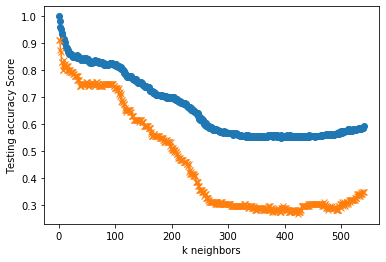

In [18]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 541, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 541, 1), train_scores, marker='o')
plt.plot(range(1, 541, 1), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [19]:
# Note that k: 1 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
print('k=1 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=1 Test Acc: 0.911


Make predictions

In [20]:
new_flight_data = [[55551, 7035784, -92683, 140, 12, 2, 9359]]
predicted_class = knn.predict(new_flight_data)
print(predicted_class)

[1]
